### Dafinah Ramadhani_23083010030_EDA(A)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv("C://Users//ASUS//Documents//Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Mencari Missing value

In [8]:
np.sum(df.isnull())

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

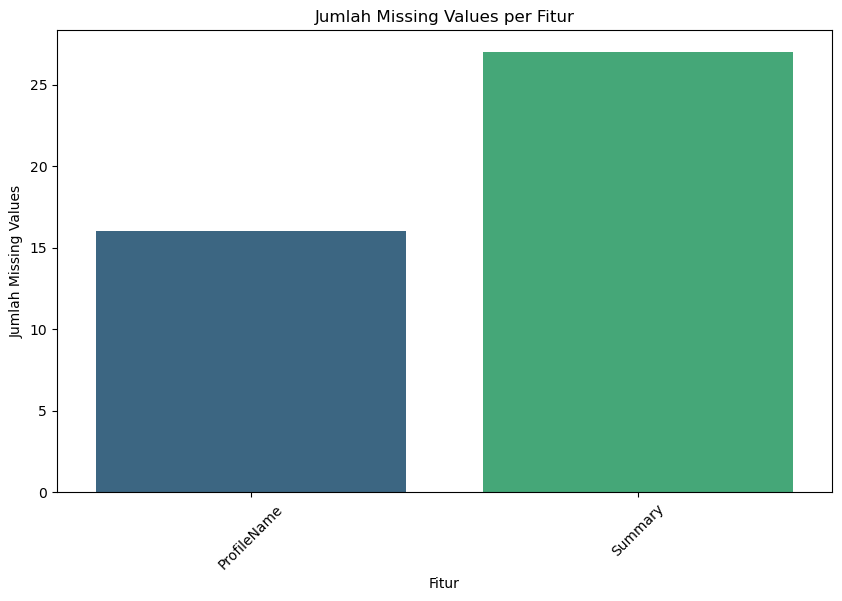

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan df adalah DataFrame Anda yang sudah diimpor

# Menghitung jumlah missing values
missing_count = df.isnull().sum()

# Filter kolom dengan missing values
missing_features = missing_count[missing_count > 0]

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_features.index, y=missing_features.values, palette='viridis')
plt.title('Jumlah Missing Values per Fitur')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Missing Values')
plt.xlabel('Fitur')
plt.show()

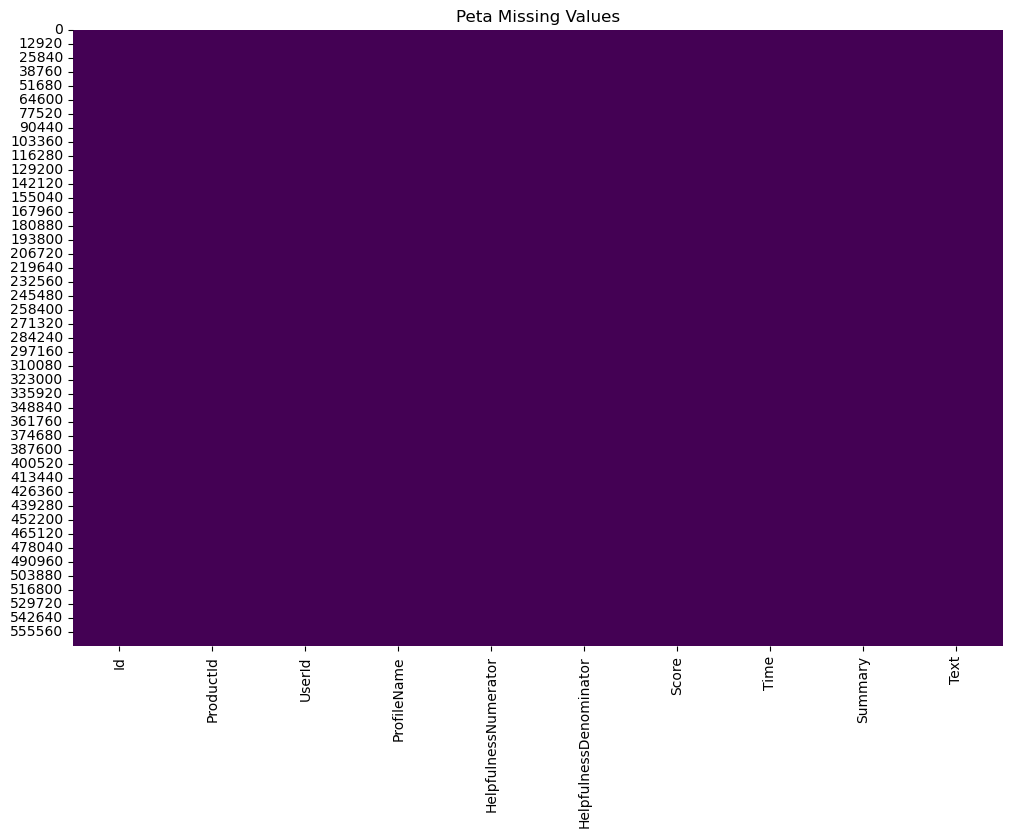

In [12]:
# Membuat visualisasi yang menunjukkan lokasi dan pola nilai yang hilang dalam DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Peta Missing Values')
plt.show()


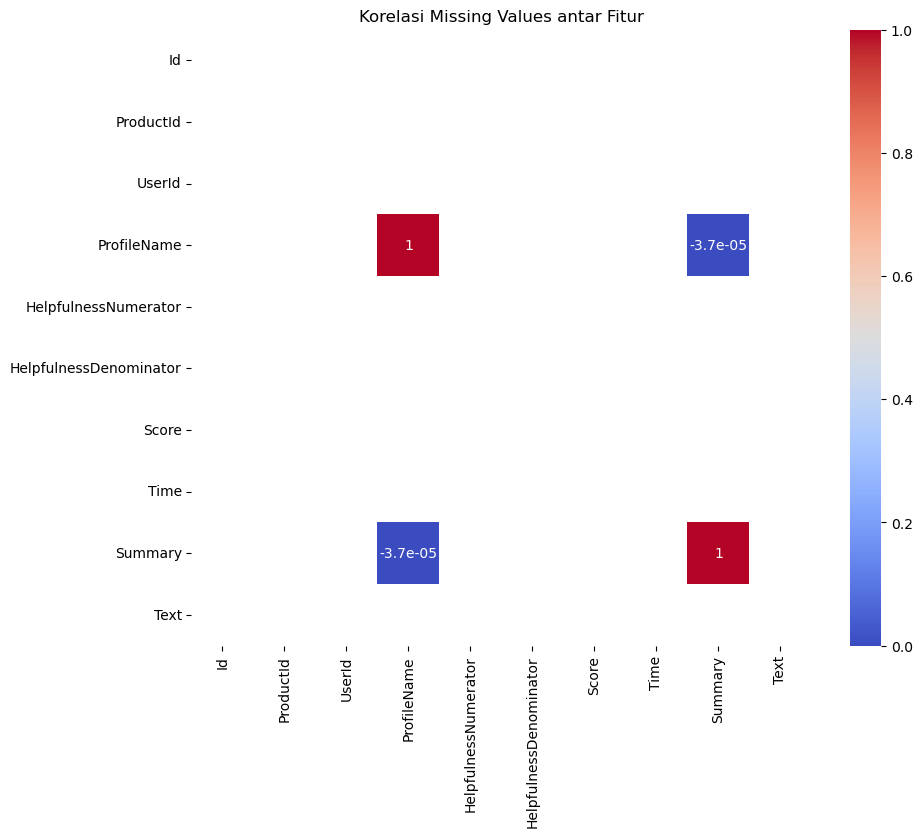

In [13]:
#menganalisis dan memvisualisasikan korelasi antara fitur-fitur dalam DataFrame
missing_corr = df.isnull().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Missing Values antar Fitur')
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_32996\3108562241.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(missing_summary['Score'], label='Missing Summary', shade=True, color='red')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_32996\3108562241.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(not_missing_summary['Score'], label='Not Missing Summary', shade=True, color='green')


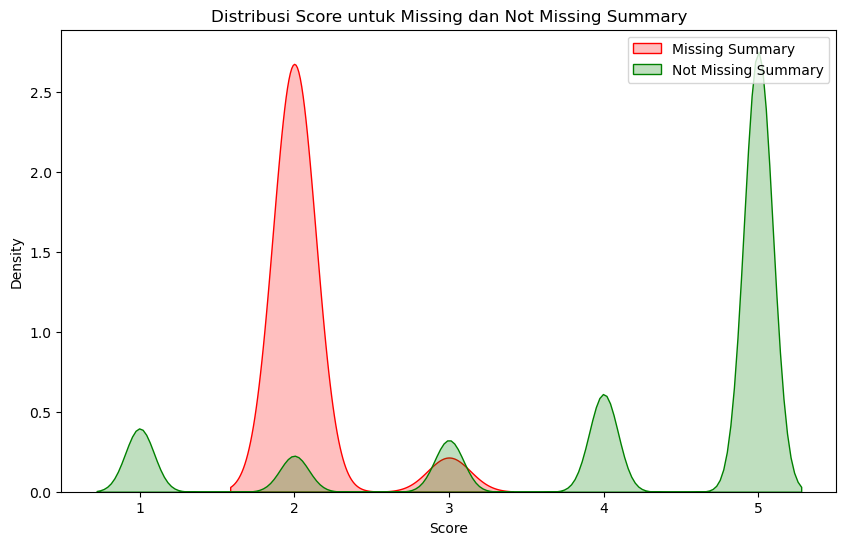

In [15]:
# Perbandingan Distribusi Skor: Kode ini membantu untuk memahami apakah terdapat perbedaan dalam distribusi skor antara entri yang memiliki nilai Summaryyang hilang dan yang tidak hilang.
missing_summary = df[df['Summary'].isnull()]
not_missing_summary = df[df['Summary'].notnull()]

# Bandingkan distribusi score
plt.figure(figsize=(10, 6))
sns.kdeplot(missing_summary['Score'], label='Missing Summary', shade=True, color='red')
sns.kdeplot(not_missing_summary['Score'], label='Not Missing Summary', shade=True, color='green')
plt.title('Distribusi Score untuk Missing dan Not Missing Summary')
plt.legend()
plt.show()


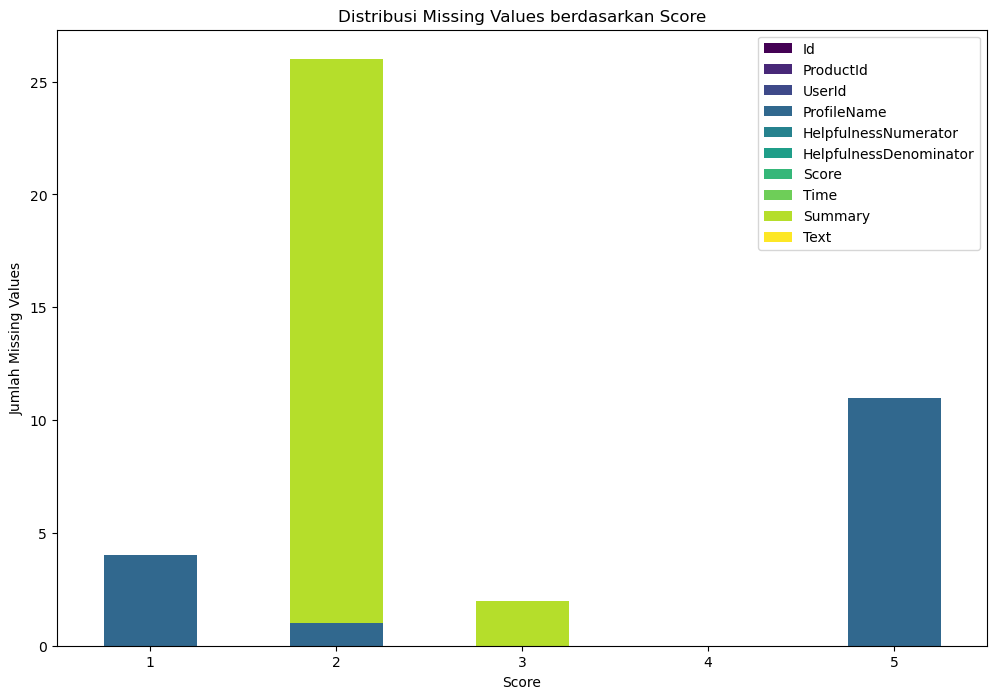

In [19]:
# menganalisis dan memvisualisasikan distribusi nilai yang hilang
missing_by_target = df.groupby('Score').apply(lambda x: x.isnull().sum())
missing_by_target.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribusi Missing Values berdasarkan Score')
plt.xlabel('Score')
plt.ylabel('Jumlah Missing Values')
plt.xticks(rotation=0)
plt.show()


In [20]:
# Analisis Penyebab Nilai Hilang
missing_percentage = df.isnull().mean() * 100
missing_percentage.sort_values(ascending=False, inplace=True)
print(missing_percentage)


Summary                   0.004750
ProfileName               0.002815
Id                        0.000000
ProductId                 0.000000
UserId                    0.000000
HelpfulnessNumerator      0.000000
HelpfulnessDenominator    0.000000
Score                     0.000000
Time                      0.000000
Text                      0.000000
dtype: float64


## dummy variabel

In [36]:
import pandas as pd

# Baca data
df = pd.read_csv("C://Users//ASUS//Documents//Reviews.csv")

# Cek nama kolom
print(df.columns)

# Cek jumlah nilai unik pada kolom yang relevan
print(df['Summary'].nunique()) 


df['Score_Category'] = pd.cut(df['Score'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

# Melakukan dummy encoding pada kategori yang baru dibuat
df_dummies = pd.get_dummies(df, columns=['Score_Category'], drop_first=True)

# Melihat data setelah konversi
print(df_dummies.head())


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
295742
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5 

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Score_Category_Medium', 'Score_Category_High'],
      dtype='object')


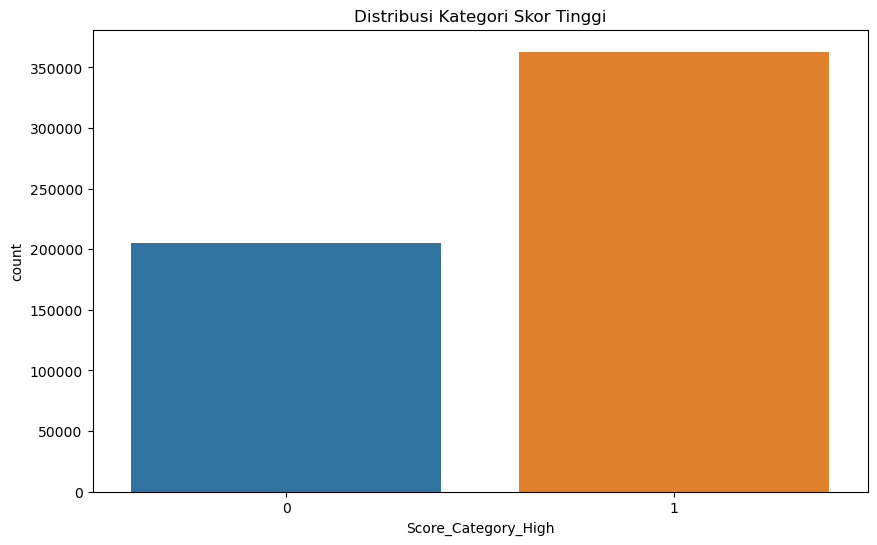

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32996\2552742749.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_dummies.corr()


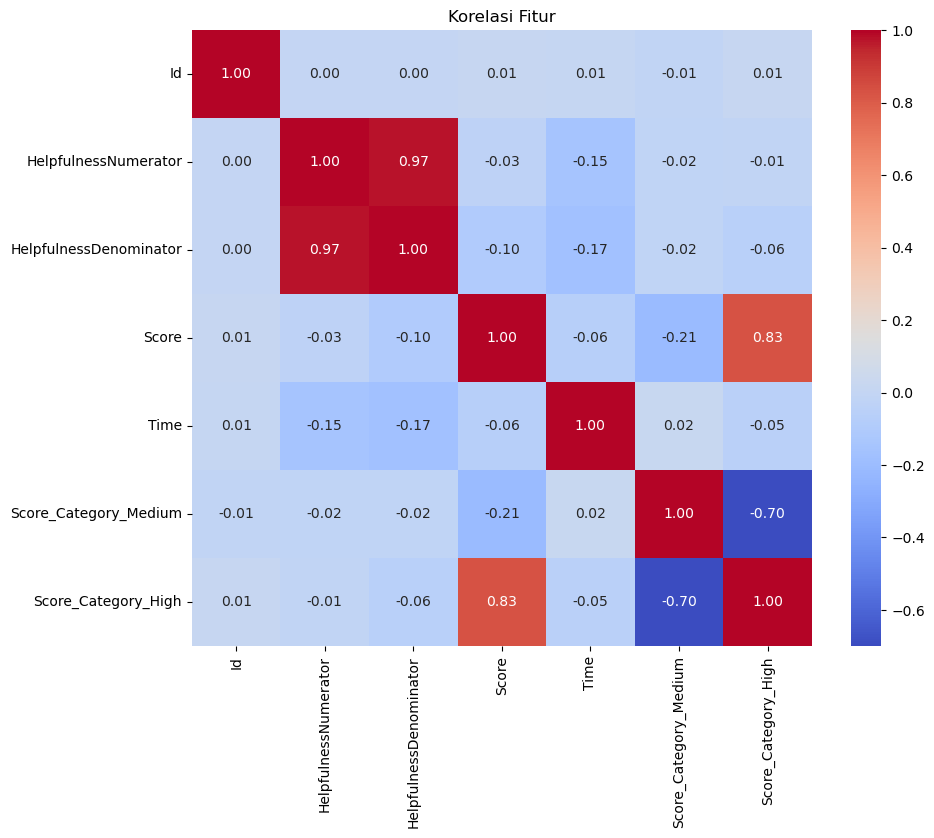

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cek nama kolom untuk memastikan
print(df_dummies.columns)

# Visualisasi distribusi kategori
plt.figure(figsize=(10, 6))
sns.countplot(x='Score_Category_High', data=df_dummies)  
plt.title('Distribusi Kategori Skor Tinggi')
plt.show()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = df_dummies.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur')
plt.show()


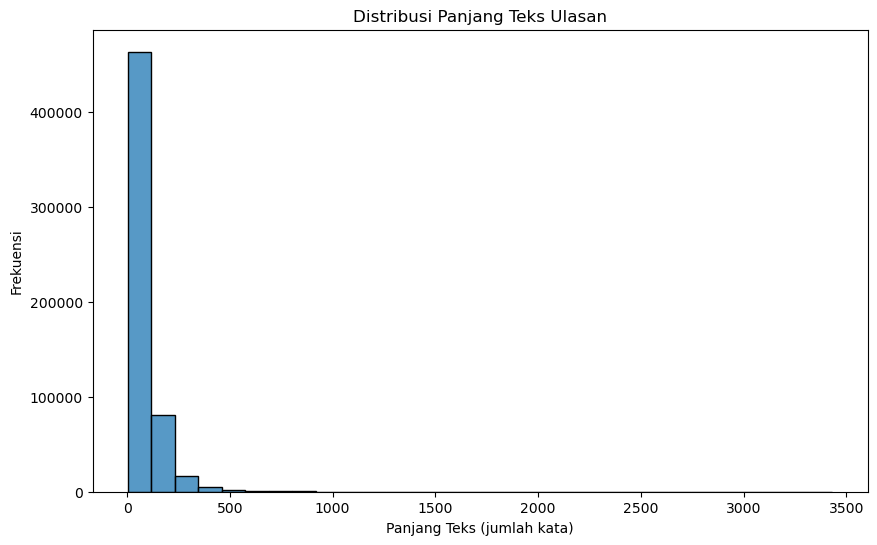

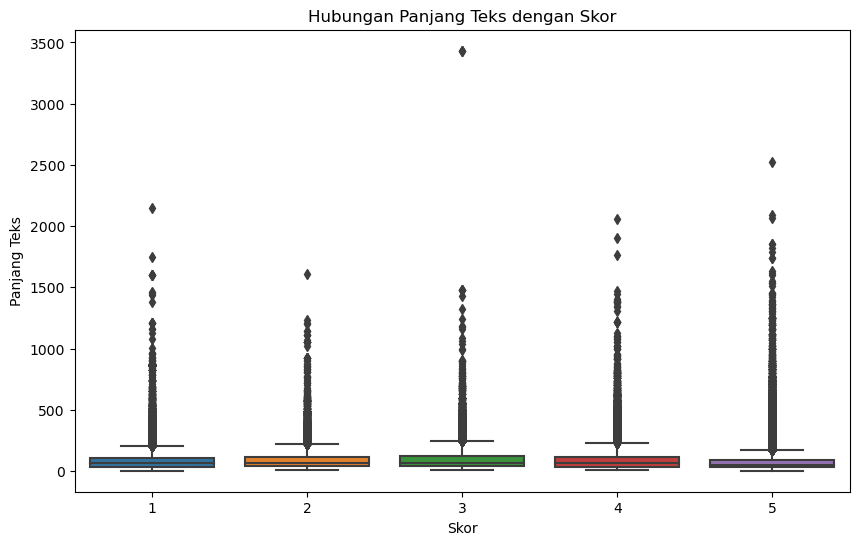

In [39]:
# Menghitung panjang teks
df_dummies['Text_Length'] = df_dummies['Text'].apply(lambda x: len(x.split()))

# Visualisasi panjang teks
plt.figure(figsize=(10, 6))
sns.histplot(df_dummies['Text_Length'], bins=30)
plt.title('Distribusi Panjang Teks Ulasan')
plt.xlabel('Panjang Teks (jumlah kata)')
plt.ylabel('Frekuensi')
plt.show()

# Analisis hubungan panjang teks dan skor
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Text_Length', data=df_dummies)
plt.title('Hubungan Panjang Teks dengan Skor')
plt.xlabel('Skor')
plt.ylabel('Panjang Teks')
plt.show()


In [43]:
import pandas as pd
import statsmodels.api as sm

# Misalkan df_dummies adalah DataFrame Anda
# Memeriksa tipe data
print(df_dummies.dtypes)

# Mengidentifikasi kolom yang bertipe objek
object_columns = df_dummies.select_dtypes(include=['object']).columns
print("Kolom dengan tipe objek:", object_columns)

# Memeriksa nilai unik dalam kolom objek
for col in object_columns:
    print(f"Unique values in {col}:\n{df_dummies[col].unique()}\n")

# Mengonversi kolom objek ke numerik jika diperlukan
# df_dummies['HelpfulnessNumerator'] = pd.to_numeric(df_dummies['HelpfulnessNumerator'], errors='coerce')

# Hapus NaN
df_dummies.dropna(inplace=True)

# Memisahkan fitur dan target
X = df_dummies.drop(['Score'], axis=1)
y = df_dummies['Score']

# Menambahkan konstanta
X = sm.add_constant(X)

# Membangun model regresi


Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Score_Category_Medium      uint8
Score_Category_High        uint8
Text_Length                int64
dtype: object
Kolom dengan tipe objek: Index(['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text'], dtype='object')
Unique values in ProductId:
['B001E4KFG0' 'B00813GRG4' 'B000LQOCH0' ... 'B003S1WTCU' 'B004I613EE'
 'B001LR2CU2']

Unique values in UserId:
['A3SGXH7AUHU8GW' 'A1D87F6ZCVE5NK' 'ABXLMWJIXXAIN' ... 'A28KG5XORO54AY'
 'A121AA1GQV751Z' 'A3LGQPJCZVL9UC']

Unique values in ProfileName:
['delmartian' 'dll pa' 'Natalia Corres "Natalia Corres"' ...
 'Lettie D. Carter' 'pksd "pk_007"' 'srfell17']

Unique values in Summary:
['Good Quality Dog Food' 'Not as Adve

## Outlier

In [44]:
import pandas as pd

# Misalkan df adalah DataFrame Anda
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari outlier
outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]
print(outliers)


            Id   ProductId          UserId      ProfileName  \
1            2  B00813GRG4  A1D87F6ZCVE5NK           dll pa   
3            4  B000UA0QIQ  A395BORC6FGVXV             Karl   
12          13  B0009XLVG0   A327PCT23YH90               LT   
16          17  B001GVISJM  A3KLWF6WQ5BNYO   Erica Neathery   
26          27  B001GVISJM  A3RXAU2N8KV45G           lady21   
...        ...         ...             ...              ...   
568433  568434  B003XUL27E  A1JUG9WCN1A52Z       maudlin666   
568434  568435  B003XUL27E   ABGQPE97ZVYJ3  Katherine Kelly   
568435  568436  B003XUL27E  A2PSB4WQHH46HN         carlyowu   
568446  568447  B001EO7N10  A2P9W8T7NTLG2Z             Andy   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5        R. Sawyer   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1                          0                       0      1  1346976000   
3                          3                       3      2  1307923200   
12                

In [45]:
from scipy import stats

# Menghitung Z-Score
z_scores = stats.zscore(df['Score'])
abs_z_scores = abs(z_scores)

# Menentukan threshold
threshold = 3

# Mencari outlier
outliers = df[abs_z_scores > threshold]
print(outliers)


Empty DataFrame
Columns: [Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text, Score_Category]
Index: []


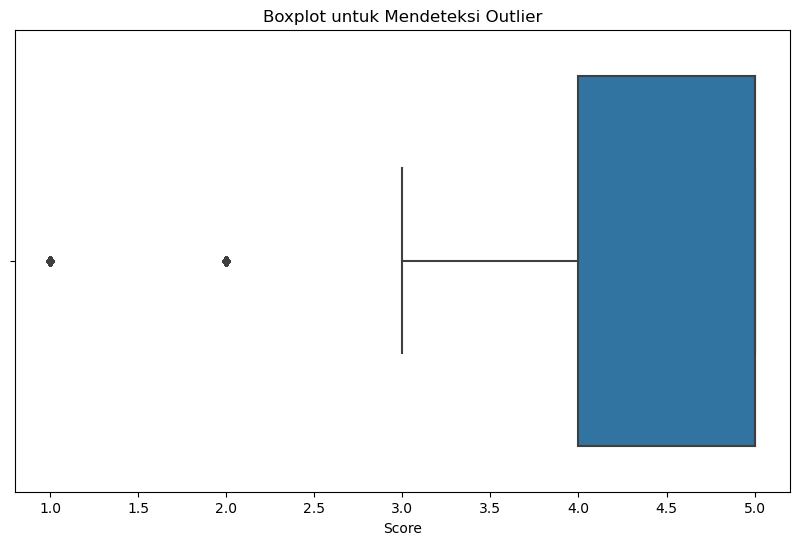

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Score'])
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()


In [47]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
Tukey_fence = 1.5 * (Q3 - Q1)

# Batas bawah dan atas
lower_bound = Q1 - Tukey_fence
upper_bound = Q3 + Tukey_fence

# Mencari outlier
outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]
print(outliers)


            Id   ProductId          UserId      ProfileName  \
1            2  B00813GRG4  A1D87F6ZCVE5NK           dll pa   
3            4  B000UA0QIQ  A395BORC6FGVXV             Karl   
12          13  B0009XLVG0   A327PCT23YH90               LT   
16          17  B001GVISJM  A3KLWF6WQ5BNYO   Erica Neathery   
26          27  B001GVISJM  A3RXAU2N8KV45G           lady21   
...        ...         ...             ...              ...   
568433  568434  B003XUL27E  A1JUG9WCN1A52Z       maudlin666   
568434  568435  B003XUL27E   ABGQPE97ZVYJ3  Katherine Kelly   
568435  568436  B003XUL27E  A2PSB4WQHH46HN         carlyowu   
568446  568447  B001EO7N10  A2P9W8T7NTLG2Z             Andy   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5        R. Sawyer   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1                          0                       0      1  1346976000   
3                          3                       3      2  1307923200   
12                

### kategorisasi variabel

In [48]:
# kolom kategori adalah 'Product_Category'
unique_categories = df['Product_Category'].unique()
print(unique_categories)


KeyError: 'Product_Category'

In [49]:
# Membuat kategori berdasarkan Score
df['Score_Category'] = pd.cut(df['Score'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
print(df['Score_Category'].value_counts())


High      363122
Medium    123295
Low        82037
Name: Score_Category, dtype: int64


In [53]:
# Menghitung Frekuensi Kategori
# Cek nama kolom
print("Nama kolom dalam DataFrame:", df.columns)

# Memastikan tidak ada spasi di nama kolom
df.columns = df.columns.str.strip()

# Jika kolom 'Product_Category' tidak ada, buat kolom kategori berdasarkan skor
if 'Product_Category' not in df.columns:
    df['Product_Category'] = df['Score'].apply(lambda x: 'High' if x > 3 else 'Low')

# Cek hasil pembuatan kolom kategori
print("DataFrame setelah menambahkan kolom 'Product_Category':")
print(df.head())

# Menghitung jumlah masing-masing kategori
category_counts = df['Product_Category'].value_counts()
print("Jumlah setiap kategori produk:")
print(category_counts)


Nama kolom dalam DataFrame: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Product_Category'],
      dtype='object')
DataFrame setelah menambahkan kolom 'Product_Category':
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                    

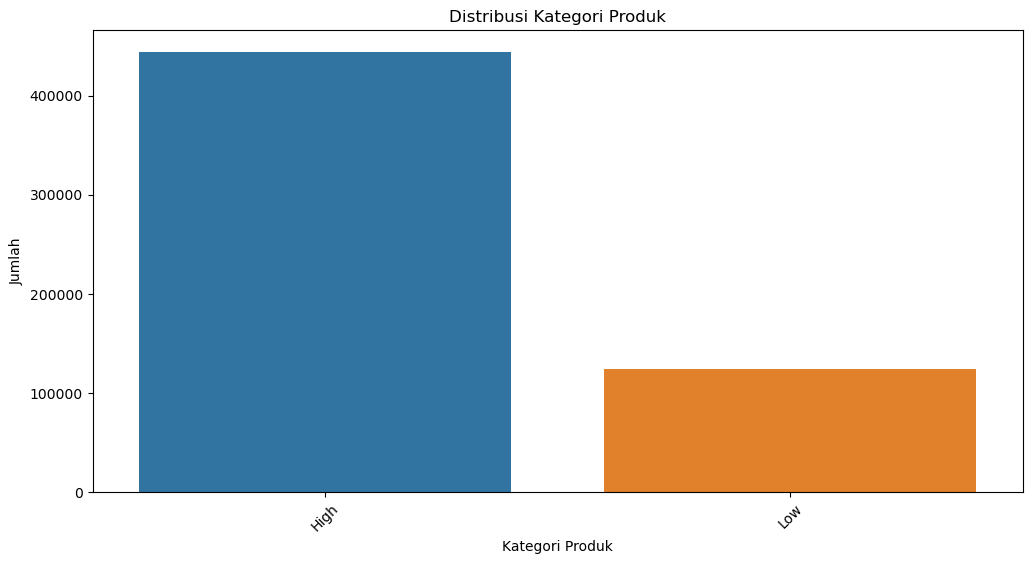

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', order=category_counts.index)
plt.title('Distribusi Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model ANOVA
model = ols('Score ~ C(Product_Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                            sum_sq        df             F  PR(>F)
C(Product_Category)  816010.981001       1.0  2.896235e+06     0.0
Residual             160160.712575  568452.0           NaN     NaN
